<a href="https://colab.research.google.com/github/sumugowda/tensorFlow2cat-dog-classification/blob/main/Tensorflow_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification using CNNs

In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip

!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2023-12-10 17:06:31--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-12-10 17:06:32--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaf849d50a5e1b651ffa7fda60d.dl.dropboxusercontent.com/cd/0/inline/CJK3E8qiz4LxgMsY89UWPkmOrtQudozJ1DEqmYgebNd5w93lXPo2oSgEaSVvGf_l_ZEcvIJv3_6iqQ87YeXCrNBQsOMNf2p3i-KwhbXlBpe2JEktinkW4OzO7WHS85OgM5VQE6ow75s_7mFQTkdvr5JF/file# [following]
--2023-12-10 17:06:32--  https://ucaf849d50a5e1b651ffa7fda60d.dl.dropboxusercontent.com/cd/0/inline/CJK3E8qiz4LxgMsY89UWPkmOrtQudozJ1DEqmYgebNd5w93lXPo2oSgEaSVvGf_l_ZEcvIJv3_6iqQ87YeXCrNBQ

In [ ]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

# Printing a sample image of a cat



Populating the interactive namespace from numpy and matplotlib


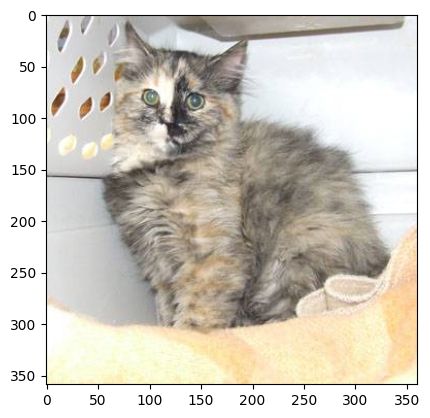

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
img = npimg.imread('/content/test_set/test_set/cats/cat.4005.jpg')
imgplot = plt.imshow(img)
plt.show()

# Printing a sample image of a cat

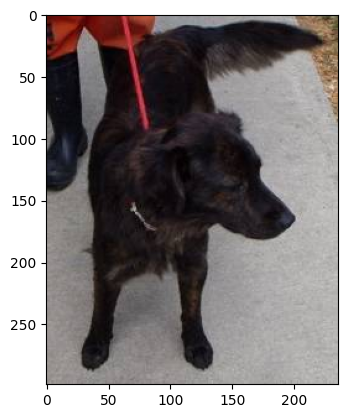

In [ ]:
img = npimg.imread('/content/test_set/test_set/dogs/dog.4007.jpg')
imgplot = plt.imshow(img)
plt.show()


# Importing the required libraries

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# TensorFlow version that we are using:

In [ ]:
print(tensorflow.__version__)

2.12.0


# Parameter initialization

In [ ]:
img_width, img_height = 150,150
train_data_dir = r"/content/training_set/training_set"
validation_data_dir = r"/content/test_set/test_set"
nb_train_sample = 100
nb_validation_samples = 100
epochs = 20
batch_size = 20

# Checking shapes of the images


  Image data is represented in a 3D array:[rows][cols][channels] in a channel last representation. Channels are the first dimention in channel first representation.

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format() == 'channels_first':
  inpput_shape = (3, img_width, img_height)
else:
  input_shape = (img_width, img_height,3)

# Image generation to train the model

In [ ]:
train_datagen = ImageDataGenerator (rescale=1. /255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator (rescale = 1. /255) #Bringing RGB values from 0-255 to a range of 0.

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size =(img_width,img_height), batch_size = batch_size,class_mode = 'binary',classes=['cats','dogs'])

validation_generator = test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width, img_height), batch_size = batch_size, class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# Representation of ImageDataGenerator

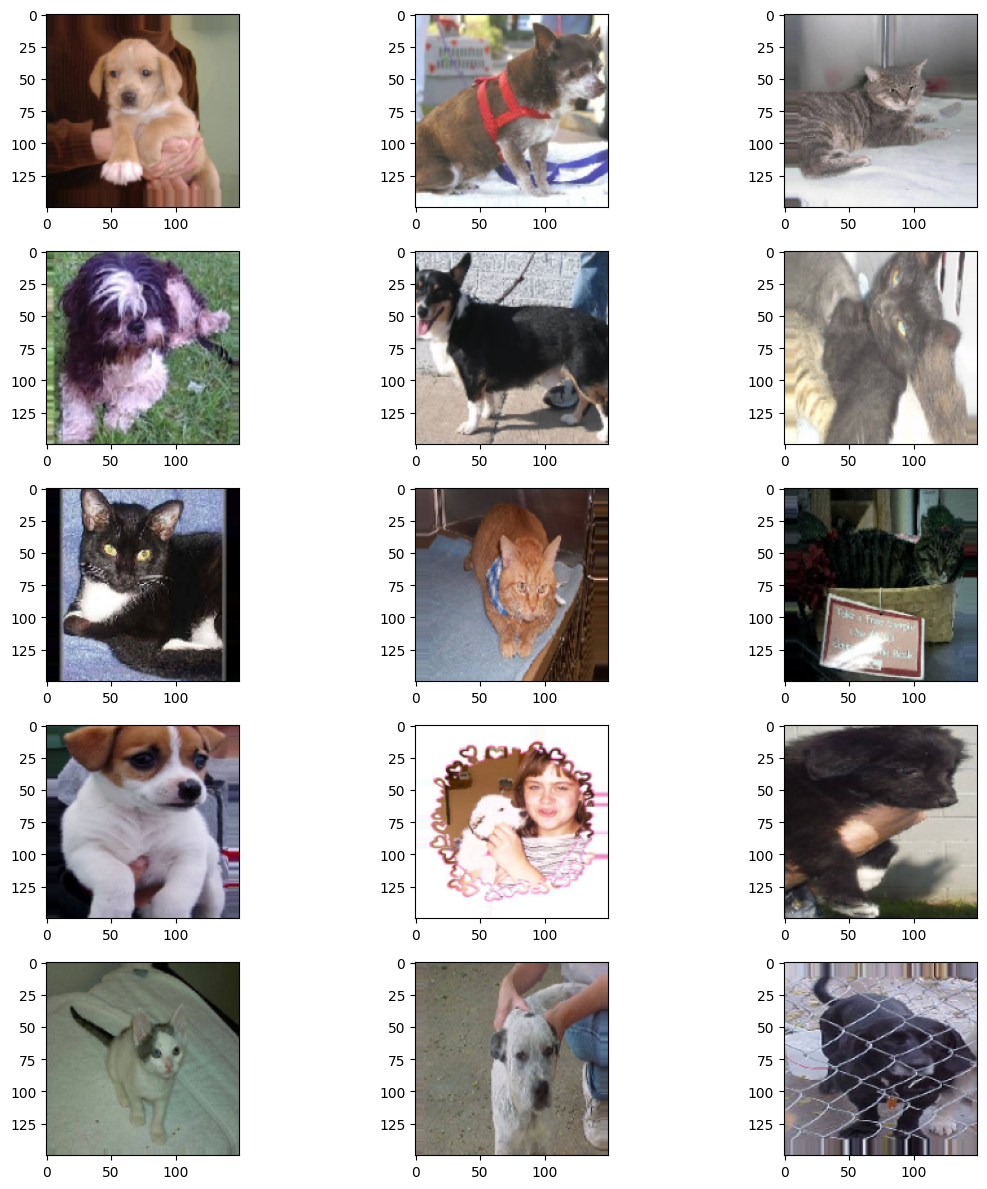

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch, Y_batch in train_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

# Building the CNN Model

Layers in CNN:

1. Convolutional Layer

2. ReLu

3. Pooling Layer

4. Fully Connected Layer (Dense)



In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3),input_shape=input_shape)) #64 neurons using a 3x3 filter

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #Pooling reduces the size of the data

model.add(Flatten()) #conversion of multidimentional array to 1d array
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1)) #outputLayer
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

# Model compilation

In [ ]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

# Model Fitting

In [ ]:
%load_ext tensorboard #loads tensorboard
!rm -rf ./myLogs/ #removes the log folder


In [ ]:
training = model.fit(train_generator, steps_per_epoch= nb_train_sample, epochs= epochs, validation_data = validation_generator, validation_steps = nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 139s 1s/step - loss: 1.5977 - accuracy: 0.5451 - val_loss: 0.6548 - val_accuracy: 0.6040
Epoch 2/20
100/100 [==============================] - 135s 1s/step - loss: 0.6696 - accuracy: 0.6100 - val_loss: 0.6201 - val_accuracy: 0.6750
Epoch 3/20
100/100 [==============================] - 149s 1s/step - loss: 0.6454 - accuracy: 0.6510 - val_loss: 0.6074 - val_accuracy: 0.6745
Epoch 4/20
100/100 [==============================] - 159s 2s/step - loss: 0.6335 - accuracy: 0.6375 - val_loss: 0.6723 - val_accuracy: 0.5715
Epoch 5/20
100/100 [==============================] - 155s 2s/step - loss: 0.6294 - accuracy: 0.6435 - val_loss: 0.6020 - val_accuracy: 0.6660
Epoch 6/20
100/100 [==============================] - 152s 2s/step - loss: 0.6098 - accuracy: 0.6780 - val_loss: 0.5840 - val_accuracy: 0.6960
Epoch 7/20
100/100 [==============================] - 151s 2s/step - loss: 0.5933 - accuracy: 0.6895 - val_loss: 0.5606 - val_accuracy: 0.7080

# Finding out Model Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


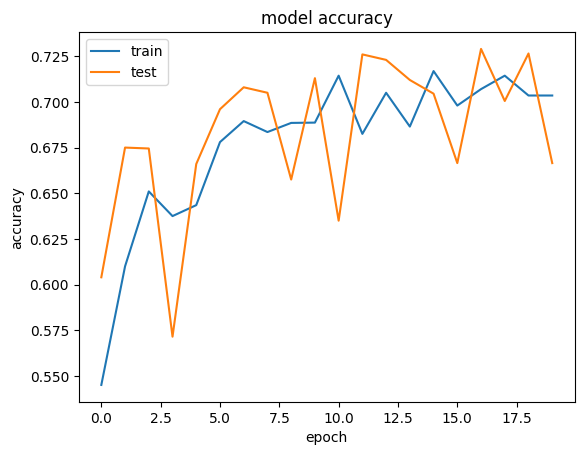

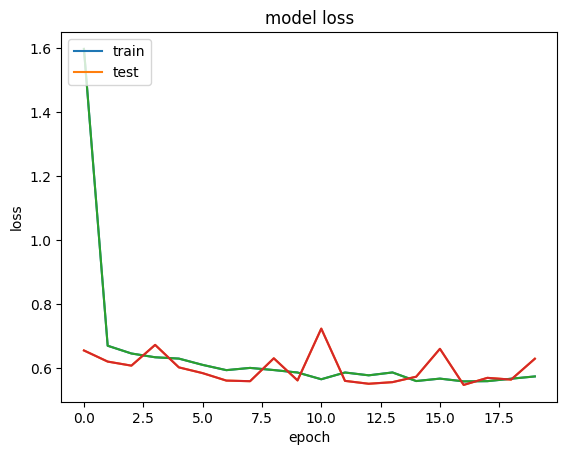

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys()) #listing all training data
plt.plot(training.history['accuracy'])

plt.plot(training.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train','test'], loc = 'upper left')

plt.show()

plt.plot(training.history['loss'])

plt.plot(training.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.plot(training.history['loss'])

plt.plot(training.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc = 'upper left')

plt.show()

1/1 [==============================] - 0s 48ms/step
[[1.]]
Prediction:  Dog


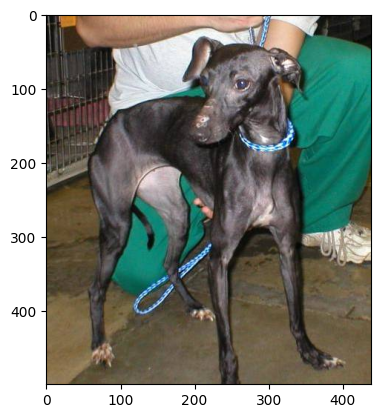

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg", target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

rslt = model.predict(img_pred)

print(rslt)

if rslt[0][0] == 1:

  prediction = "Dog"

else:

  prediction = "cat"

print('Prediction: ',prediction)

img=npimg.imread('/content/test_set/test_set/dogs/dog.4004.jpg')

imgplot = plt.imshow(img)

plt.show()